# Installed YOLOv8

In [ ]:
!nvidia-smi

Sun Jul  9 12:38:52 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.161.03   Driver Version: 470.161.03   CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
|   1  Tesla T4            Off  | 00000000:00:05.0 Off |                    0 |
| N/A   

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/kaggle/working


In [ ]:
# Pip install method (recommended)

!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.10 torch-2.0.0 CUDA:0 (Tesla T4, 15110MiB)
Setup complete ✅ (2 CPUs, 15.6 GB RAM, 4813.6/8062.4 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

# Importing the Dataset

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet




# Image Preprocessing

In [ ]:
import cv2
import numpy as np
import os

def preprocess_images(image_paths, target_size):
    preprocessed_images = []
    for image_path in image_paths:
        image = cv2.imread(image_path)
        image = cv2.resize(image, target_size)
        image = image.astype(np.float32) / 255.0
        preprocessed_images.append(image)
    return np.array(preprocessed_images)

def batch_process_images(image_paths, batch_size, target_size):
    num_images = len(image_paths)
    preprocessed_images = []
    for i in range(0, num_images, batch_size):
        batch_paths = image_paths[i:i+batch_size]
        batch_images = preprocess_images(batch_paths, target_size)
        preprocessed_images.append(batch_images)
    return np.concatenate(preprocessed_images, axis=0)

# Set the root directory where the dataset is located
dataset_root_dir = "/kaggle/working/datasets/License-Plate-Recognition-4"

# Set the target image size for resizing
target_size = (416, 416)

# Set the names of the validation and test folders
validation_folder = "/kaggle/working/datasets/License-Plate-Recognition-4/valid/images"
test_folder = "/kaggle/working/datasets/License-Plate-Recognition-4/test/images"
train_folder = "/kaggle/working/datasets/License-Plate-Recognition-4/train/images"

# Set the paths to the validation and test folders
train_dir = os.path.join(dataset_root_dir, train_folder)
validation_dir = os.path.join(dataset_root_dir, validation_folder)
test_dir = os.path.join(dataset_root_dir, test_folder)

# Get the list of image paths in each directory
train_image_paths = [os.path.join(train_dir, filename) for filename in os.listdir(train_dir)]
validation_image_paths = [os.path.join(validation_dir, filename) for filename in os.listdir(validation_dir)]
test_image_paths = [os.path.join(test_dir, filename) for filename in os.listdir(test_dir)]

# Set the batch size for preprocessing
batch_size = 32

# Preprocess the images in the training set
train_images = batch_process_images(train_image_paths, batch_size, target_size)
print("Preprocessed Train Images Shape:", train_images.shape)

# Preprocess the images in the validation set
validation_images = batch_process_images(validation_image_paths, batch_size, target_size)
print("Preprocessed Validation Images Shape:", validation_images.shape)

# Preprocess the images in the test set
test_images = batch_process_images(test_image_paths, batch_size, target_size)
print("Preprocessed Test Images Shape:", test_images.shape)

In [ ]:
import cv2
import numpy as np
import os

def preprocess_images(dataset_dir, target_size):
    # Create an empty list to store the preprocessed images
    preprocessed_images = []

    # Iterate over the files in the dataset directory
    for file_name in os.listdir(dataset_dir):
        # Check if the file is an image file
        if file_name.endswith((".jpg", ".jpeg", ".png")):
            # Construct the path to the image file
            image_path = os.path.join(dataset_dir, file_name)

            # Load the image
            image = cv2.imread(image_path)

            # Resize the image to the target size
            image = cv2.resize(image, target_size)

            # Normalize pixel values to the range of 0 to 1
            image = image.astype(np.float32) / 255.0

            # Append the preprocessed image to the list
            preprocessed_images.append(image)

    # Convert the list of preprocessed images to a NumPy array
    preprocessed_images = np.array(preprocessed_images)

    return preprocessed_images


# Set the root directory where the dataset is located
dataset_root_dir = "/kaggle/working/datasets/License-Plate-Recognition-4"

# Set the target image size for resizing
target_size = (416, 416)  # Example size, adjust according to your needs

# Set the names of the validation and test folders
validation_folder = "/kaggle/working/datasets/License-Plate-Recognition-4/valid/images"
test_folder = "/kaggle/working/datasets/License-Plate-Recognition-4/test/images"
train_folder = "/kaggle/working/datasets/License-Plate-Recognition-4/train/images"
# Set the paths to the validation and test folders
train_dir = os.path.join(dataset_root_dir, train_folder)
validation_dir = os.path.join(dataset_root_dir, validation_folder)
test_dir = os.path.join(dataset_root_dir, test_folder)

train_images = preprocess_images(train_dir, target_size)
print("Preprocessed Train Images Shape:", train_images.shape)

# Preprocess the images in the validation set
validation_images = preprocess_images(validation_dir, target_size)
print("Preprocessed Validation Images Shape:", validation_images.shape)

# Preprocess the images in the test set
test_images = preprocess_images(test_dir, target_size)
print("Preprocessed Test Images Shape:", test_images.shape)

In [ ]:
import os
import numpy as np

def load_labels_from_directory(label_dir):
    labels = []
    for label_file in os.listdir(label_dir):
        with open(os.path.join(label_dir, label_file), 'r') as f:
            lines = f.readlines()

        for line in lines:
            line = line.strip().split(' ')
            class_index = int(line[0])
            x, y, width, height = map(float, line[1:])
            # Convert from relative coordinates to absolute coordinates
            x_min = x - width / 2
            y_min = y - height / 2
            x_max = x + width / 2
            y_max = y + height / 2
            labels.append([class_index, x_min, y_min, x_max, y_max])

    return np.array(labels)

# Set the paths to the label directories
train_labels_dir = "/kaggle/working/datasets/License-Plate-Recognition-4/train/labels"
validation_labels_dir = "/kaggle/working/datasets/License-Plate-Recognition-4/valid/labels"
test_labels_dir = "/kaggle/working/datasets/License-Plate-Recognition-4/test/labels"

# Load the label data for each dataset split
train_labels = load_labels_from_directory(train_labels_dir)
validation_labels = load_labels_from_directory(validation_labels_dir)
test_labels = load_labels_from_directory(test_labels_dir)

In [ ]:
# Check the shape of the loaded labels
print("Train Labels Shape:", train_labels.shape)
print("Validation Labels Shape:", validation_labels.shape)
print("Test Labels Shape:", test_labels.shape)

Train Labels Shape: (22028, 5)
Validation Labels Shape: (2132, 5)
Test Labels Shape: (1048, 5)


# Train license plate detection model

In [ ]:
!cat /kaggle/working/datasets/License-Plate-Recognition-4/data.yaml


names:
- License_Plate
nc: 1
roboflow:
  license: CC BY 4.0
  project: license-plate-recognition-rxg4e
  url: https://universe.roboflow.com/roboflow-universe-projects/license-plate-recognition-rxg4e/dataset/4
  version: 4
  workspace: roboflow-universe-projects
test: ../test/images
train: License-Plate-Recognition-4/train/images
val: License-Plate-Recognition-4/valid/images


In [ ]:
import yaml

# Specify the path to the data.yaml file
data_yaml_path = "/kaggle/working/datasets/License-Plate-Recognition-4/data.yaml"

# Read the contents of the data.yaml file
with open(data_yaml_path, 'r') as file:
    data_yaml = yaml.safe_load(file)

# Update the validation images directory path
data_yaml['val'] = '/kaggle/working/datasets/License-Plate-Recognition-4/valid/images'
data_yaml['train'] = '/kaggle/working/datasets/License-Plate-Recognition-4/train/images'
data_yaml['test'] = '/kaggle/working/datasets/License-Plate-Recognition-4/test/images'

# Write the updated data.yaml file
with open(data_yaml_path, 'w') as file:
    yaml.dump(data_yaml, file)

In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data=/kaggle/working/datasets/License-Plate-Recognition-4/data.yaml epochs=25 imgsz=416 plots=True

/kaggle/working
100%|██████████████████████████████████████| 21.5M/21.5M [00:00<00:00, 66.8MB/s]

Ultralytics YOLOv8.0.20 🚀 Python-3.10.10 torch-2.0.0 CUDA:0 (Tesla T4, 15110MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/kaggle/working/datasets/License-Plate-Recognition-4/data.yaml, epochs=25, patience=50, batch=16, imgsz=416, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None

In [ ]:
!ls {HOME}/runs/detect/train/

F1_curve.png					   train_batch19860.jpg
PR_curve.png					   train_batch19861.jpg
P_curve.png					   train_batch19862.jpg
R_curve.png					   train_batch2.jpg
args.yaml					   val_batch0_labels.jpg
confusion_matrix.png				   val_batch0_pred.jpg
events.out.tfevents.1688907353.d8407d3e3ff5.134.0  val_batch1_labels.jpg
results.csv					   val_batch1_pred.jpg
results.png					   val_batch2_labels.jpg
train_batch0.jpg				   val_batch2_pred.jpg
train_batch1.jpg				   weights


/kaggle/working


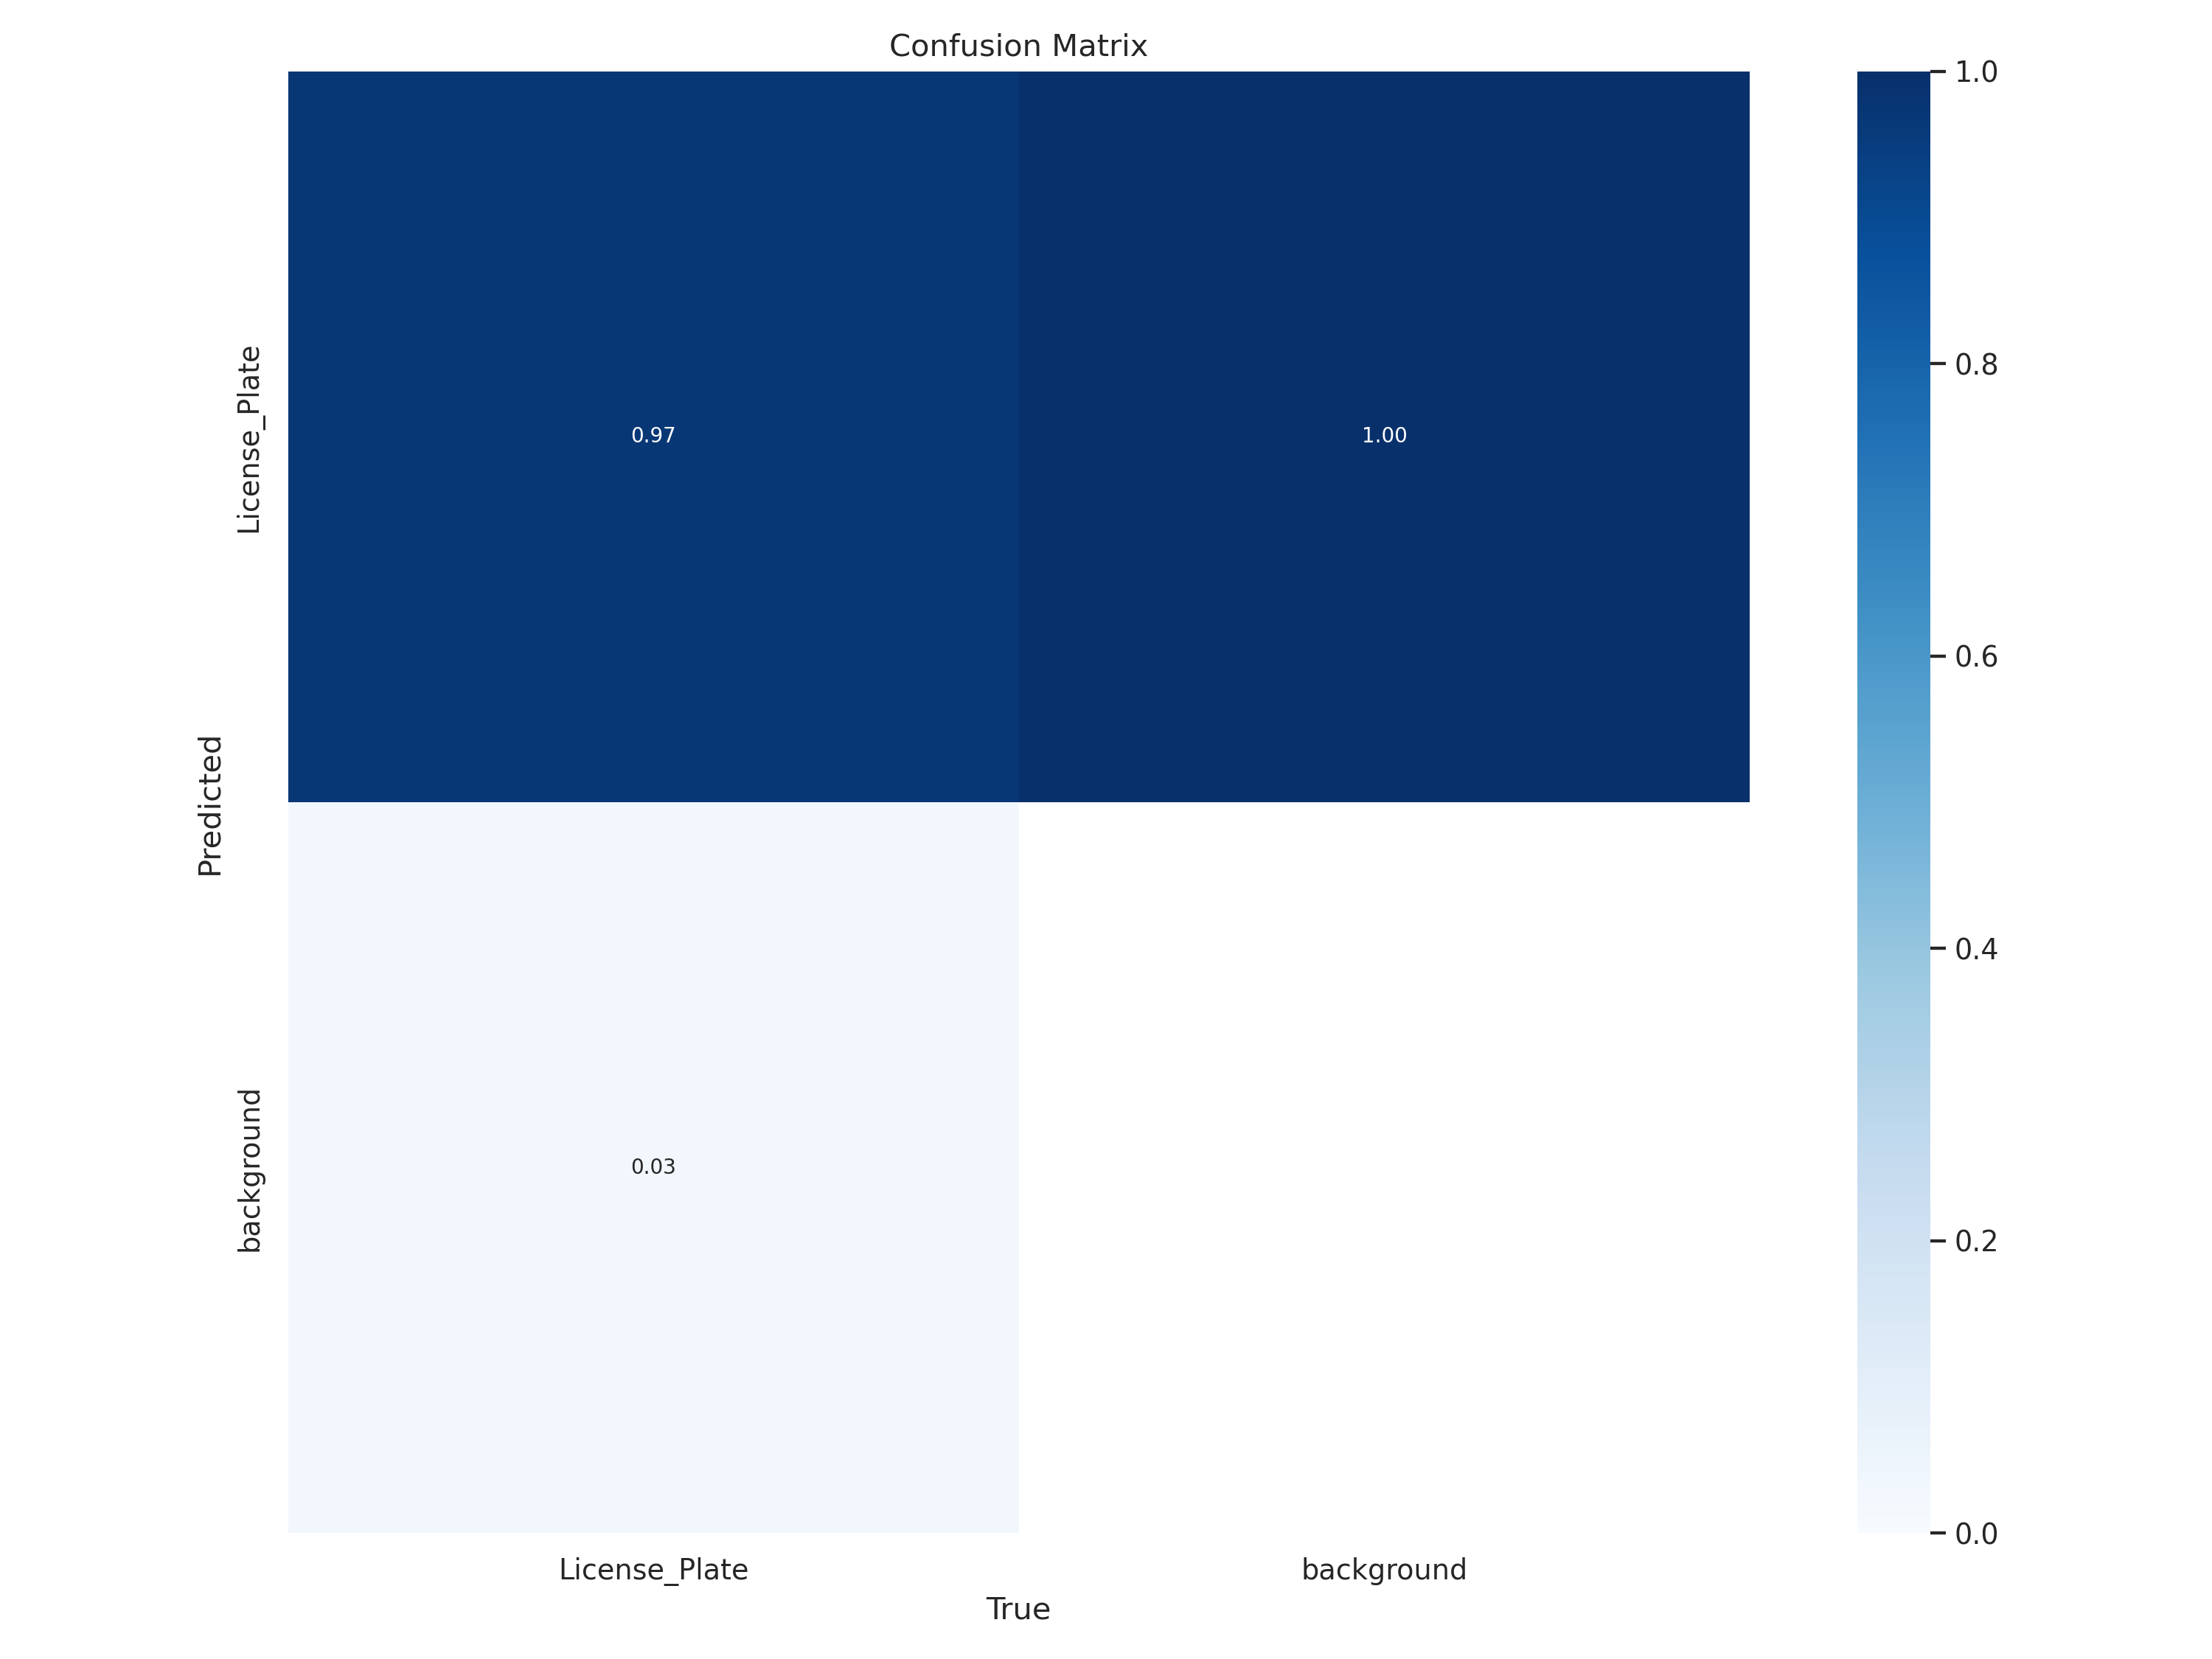

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=800)

/kaggle/working


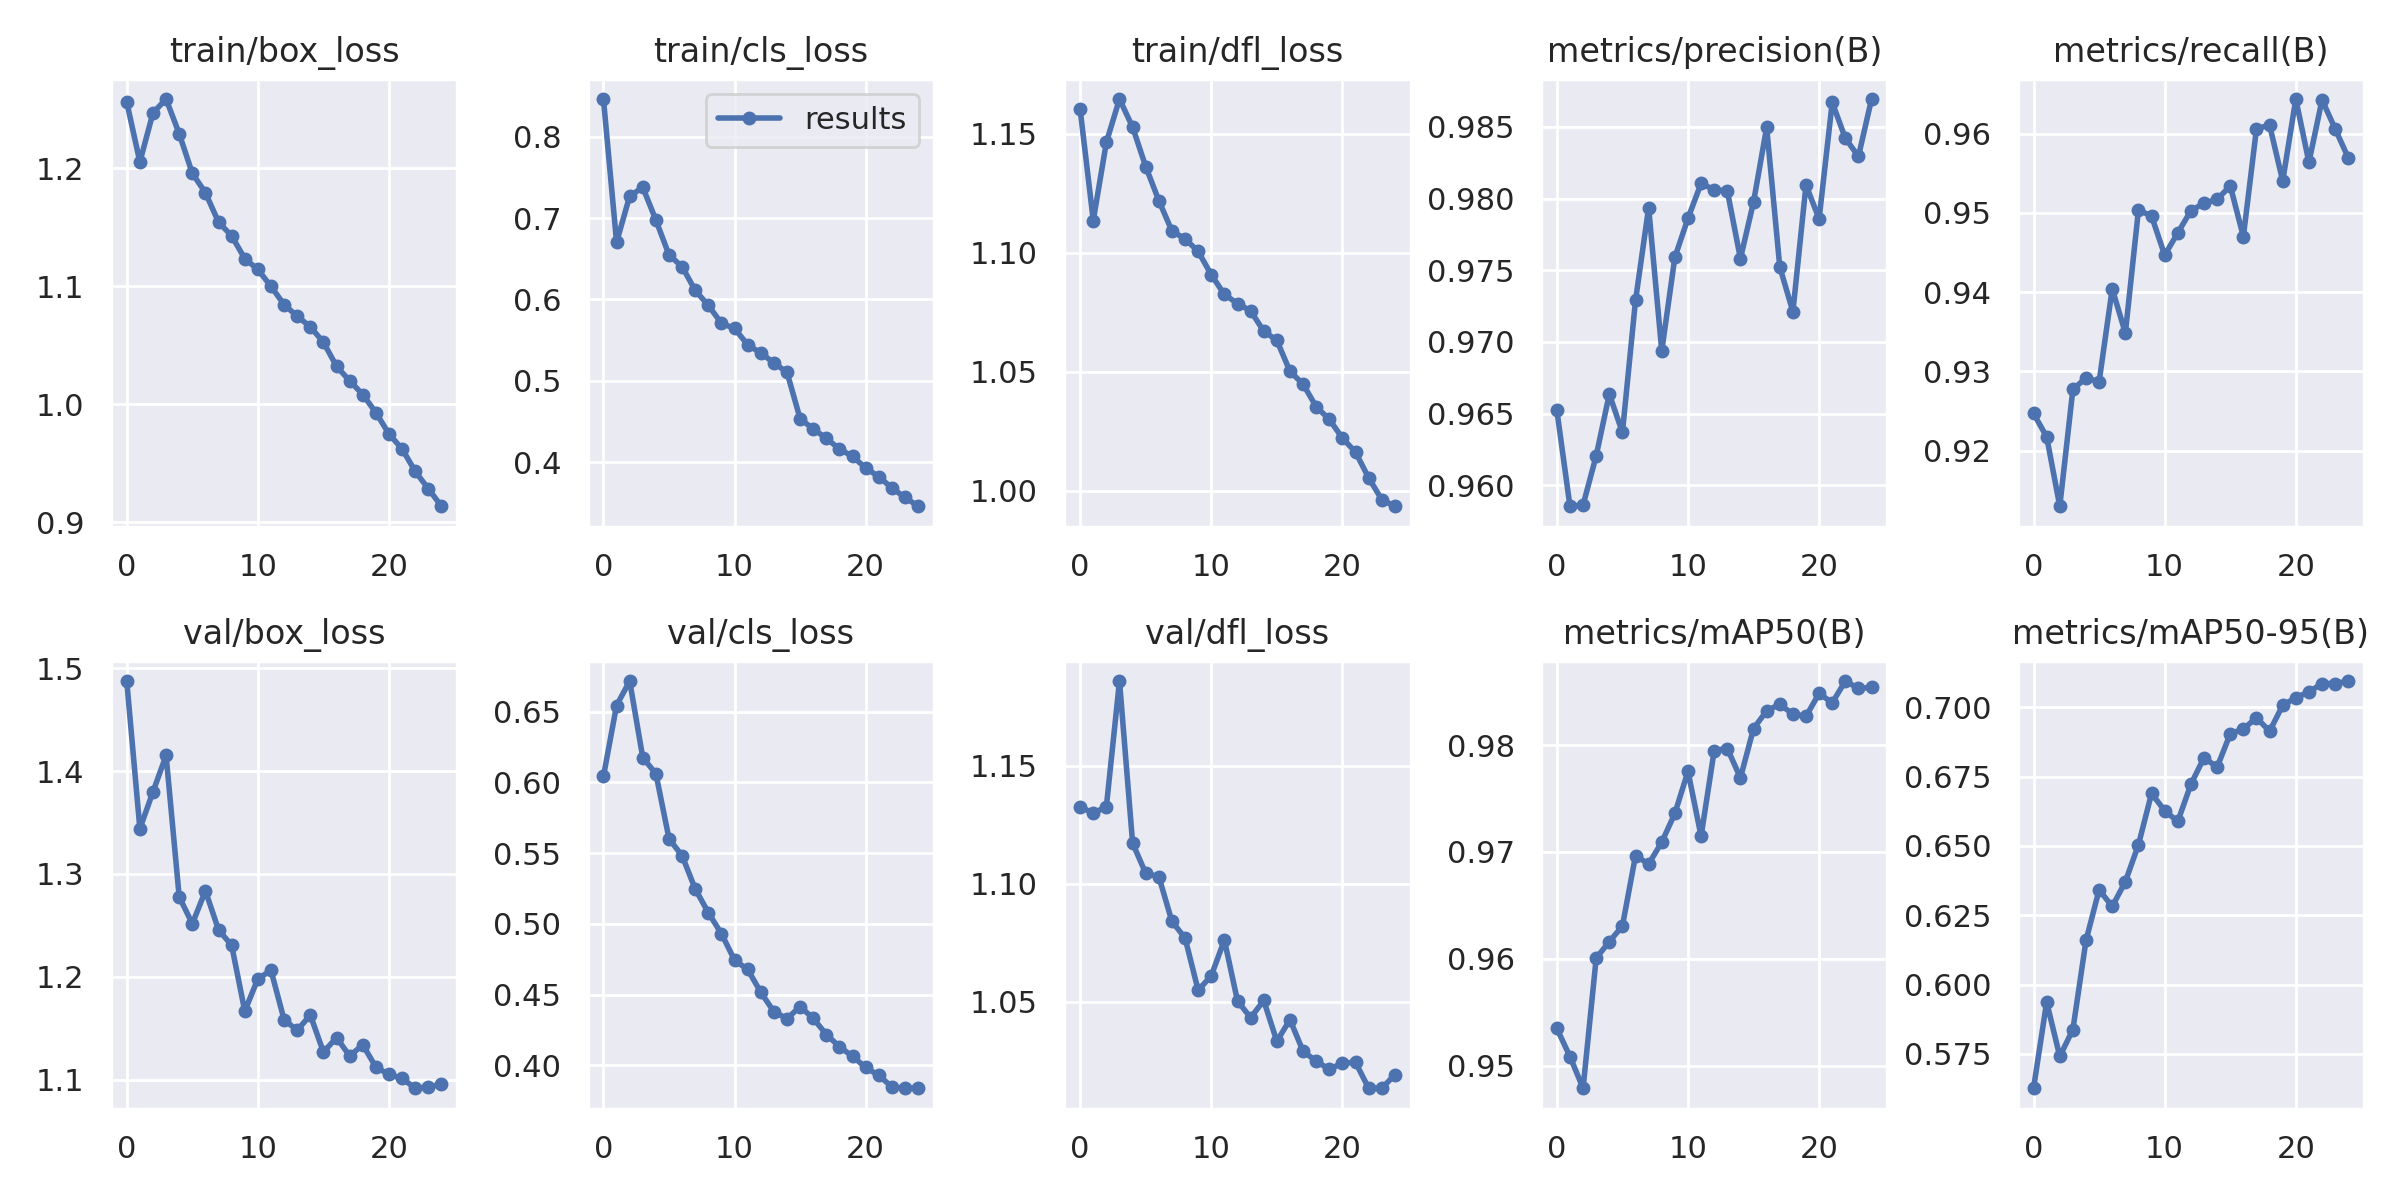

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=800)

/kaggle/working


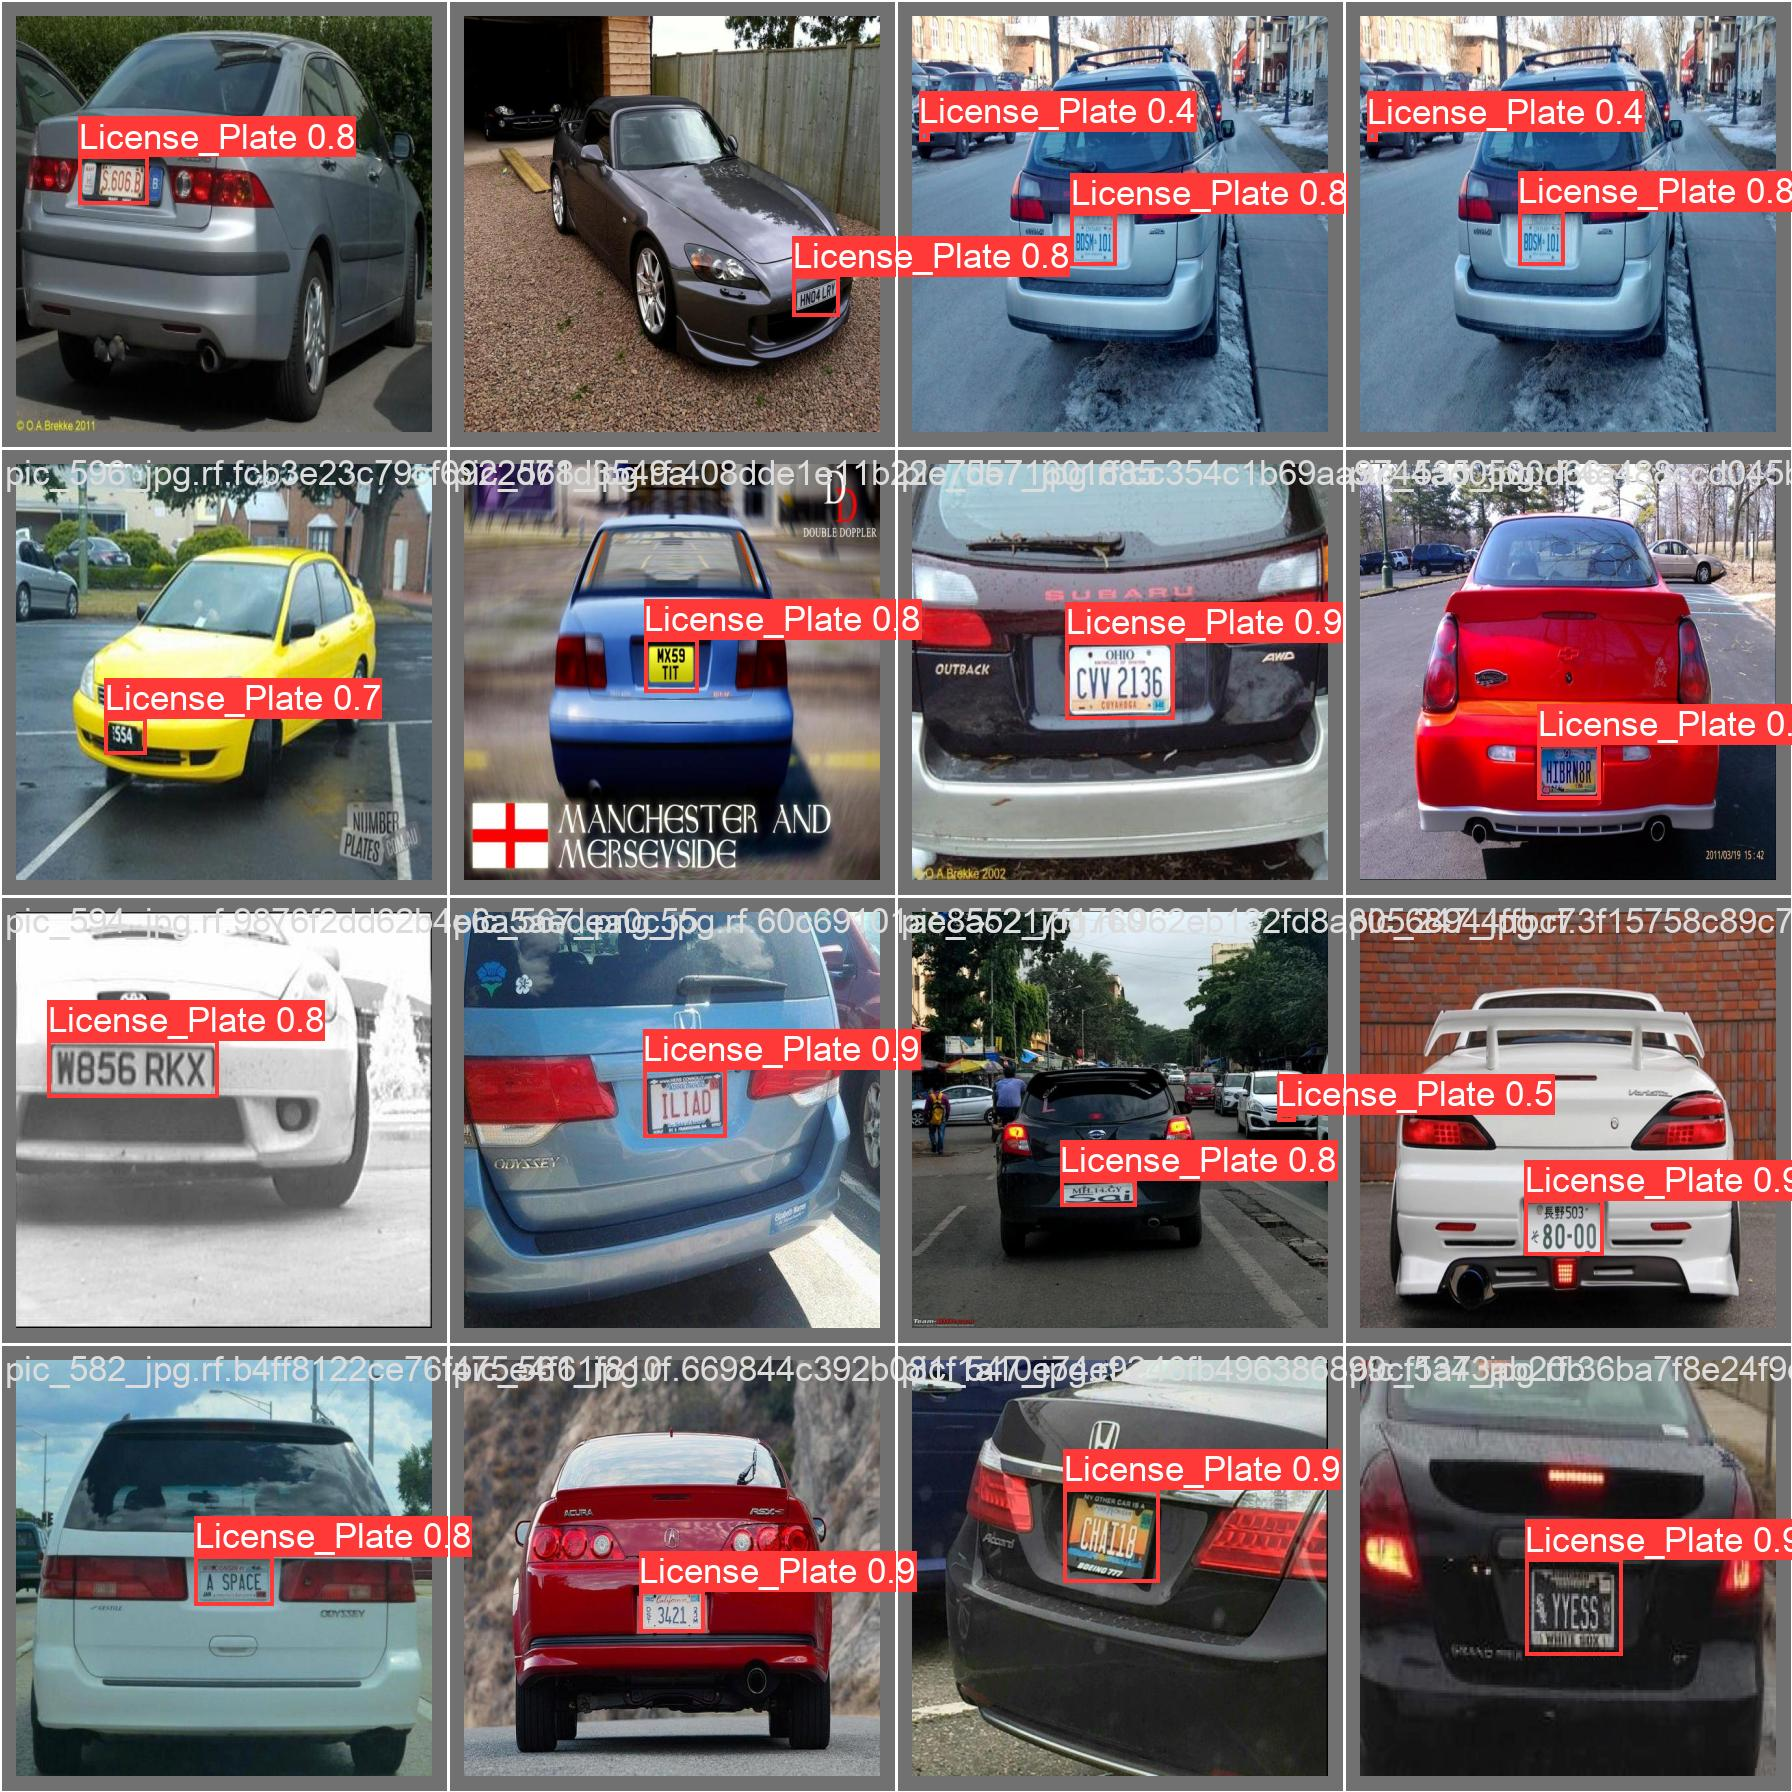

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch1_pred.jpg', width=1000)

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/kaggle/working
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symb

# Inference with Custom Model

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/kaggle/working
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symb

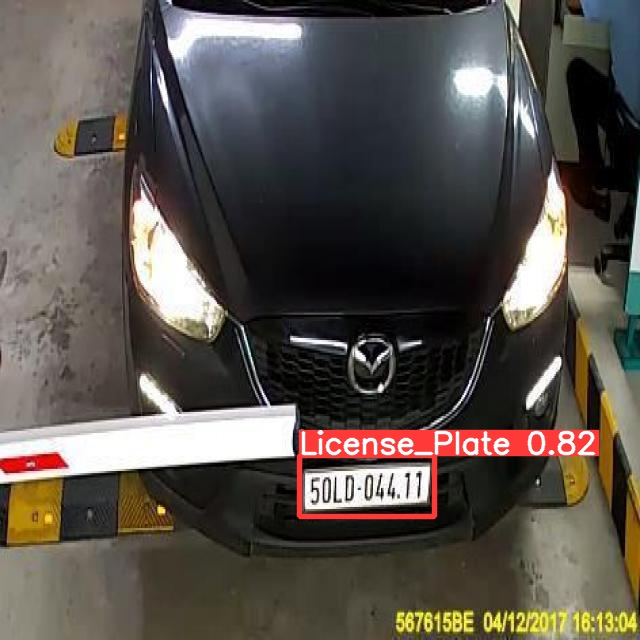

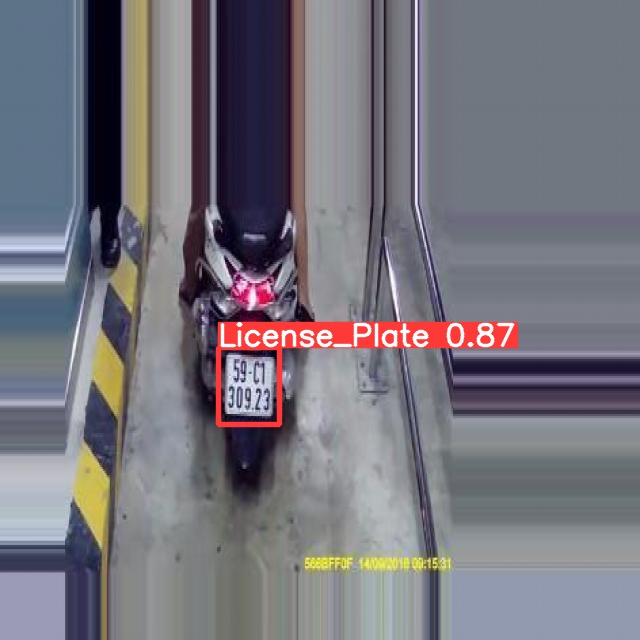

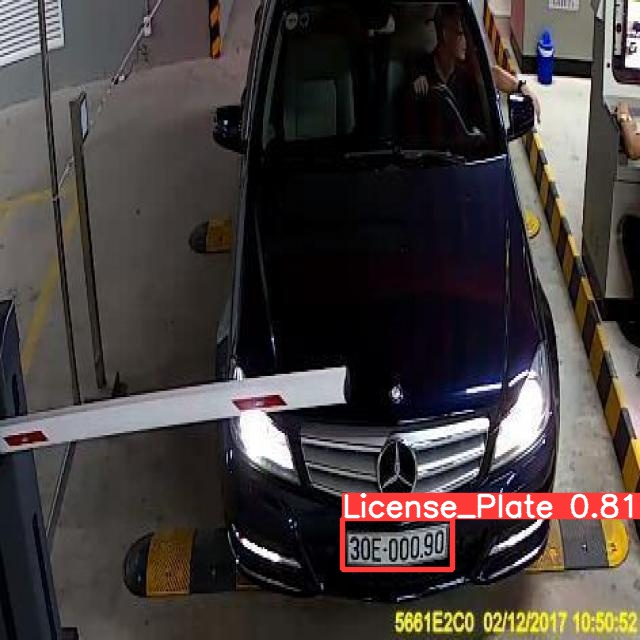

In [ ]:
import glob
from IPython.display import Image, display

# Set the path to the predicted images directory
predicted_images_dir = f'{HOME}/runs/detect/predict'

# Get the paths of the predicted image files
predicted_image_paths = glob.glob(f'{predicted_images_dir}/*.jpg')

# Display a sample of the test images
for image_path in predicted_image_paths[:3]:
    display(Image(filename=image_path, width=600))
    print("\n")